In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data/RainInAustralia/weatherAUS.csv', encoding='utf-8')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [58]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [5]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)

In [6]:
wind_enc = preprocessing.LabelEncoder()
wind_enc.classes_ = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
df['WindGustDir_cd'] = wind_enc.transform(df['WindGustDir'])
df['WindDir9am_cd'] = wind_enc.transform(df['WindDir9am'])
df['WindDir3pm_cd'] = wind_enc.transform(df['WindDir3pm'])

In [7]:
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

In [62]:
df.dtypes

Date               object
Location           object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
WindGustDir        object
WindGustSpeed     float64
WindDir9am         object
WindDir3pm         object
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Temp9am           float64
Temp3pm           float64
RainToday          object
RainTomorrow       object
WindGustDir_cd      int32
WindDir9am_cd       int32
WindDir3pm_cd       int32
dtype: object

In [8]:
df = df[~df['RainTomorrow'].isna()]

In [76]:
df.isna().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      0
WindGustDir_cd    0
WindDir9am_cd     0
WindDir3pm_cd     0
dtype: int64

In [9]:
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

C:\Users\ishih\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
df.fillna(df.median(), inplace=True)

C:\Users\ishih\AppData\Local\Temp\ipykernel_2988\3604797450.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [11]:
df['RainToday'] = df['RainToday'].astype('category').cat.codes
df['RainTomorrow'] = df['RainTomorrow'].astype('category').cat.codes

C:\Users\ishih\AppData\Local\Temp\ipykernel_2988\4133900215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'] = df['RainToday'].astype('category').cat.codes
C:\Users\ishih\AppData\Local\Temp\ipykernel_2988\4133900215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'] = df['RainTomorrow'].astype('category').cat.codes


In [12]:
df.nunique()

Date              3436
Location            49
MinTemp            389
MaxTemp            505
Rainfall           679
WindGustDir         16
WindGustSpeed       67
WindDir9am          16
WindDir3pm          16
WindSpeed9am        43
WindSpeed3pm        44
Humidity9am        101
Humidity3pm        101
Pressure9am        546
Pressure3pm        549
Temp9am            440
Temp3pm            500
RainToday            2
RainTomorrow         2
WindGustDir_cd      16
WindDir9am_cd       16
WindDir3pm_cd       16
dtype: int64

In [13]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_cd,WindDir9am_cd,WindDir3pm_cd
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,12,13
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,13,15,11
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,11,12,11
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2,6,4
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0,4,5,4
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0,4,6,3
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0,15,6,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0,0,6,13


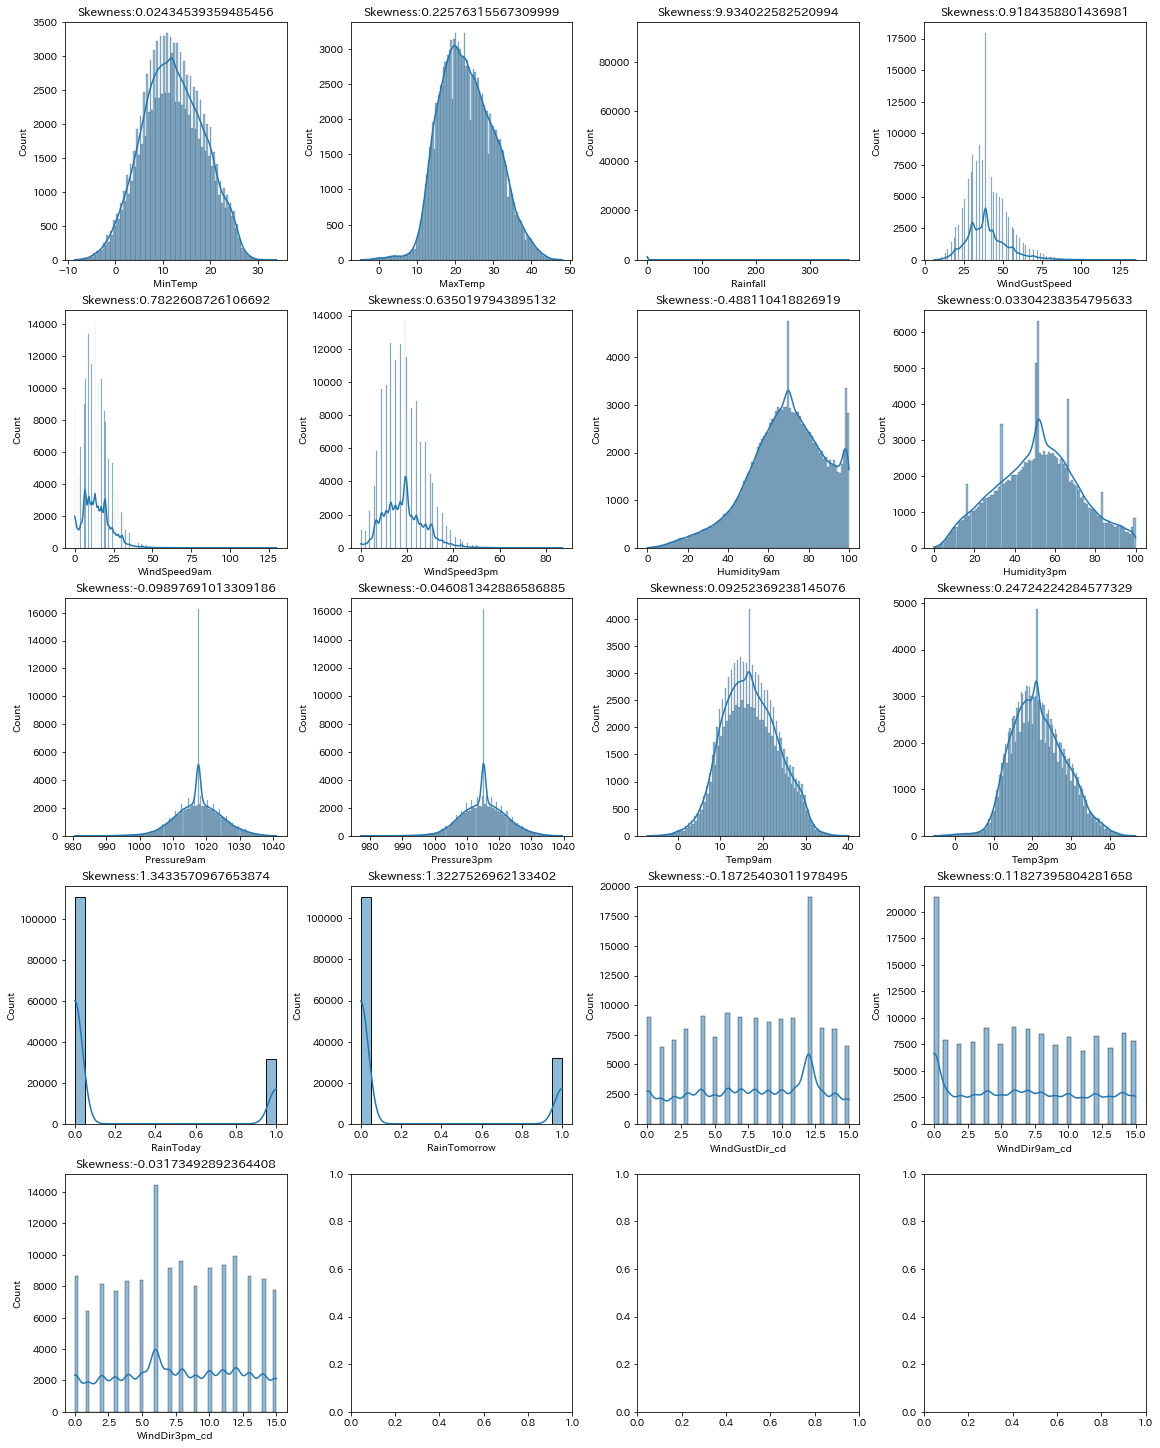

In [14]:
fig,ax=plt.subplots(5,4, figsize=(16,20),constrained_layout=True)
ax=ax.ravel()

for index, col in enumerate(df.dtypes[df.dtypes != 'object'].index):
    sns.histplot(x=col,data=df,ax=ax[index],
               kde=True)
    ax[index].set_title(f'Skewness:{df[col].skew(axis = 0)}')

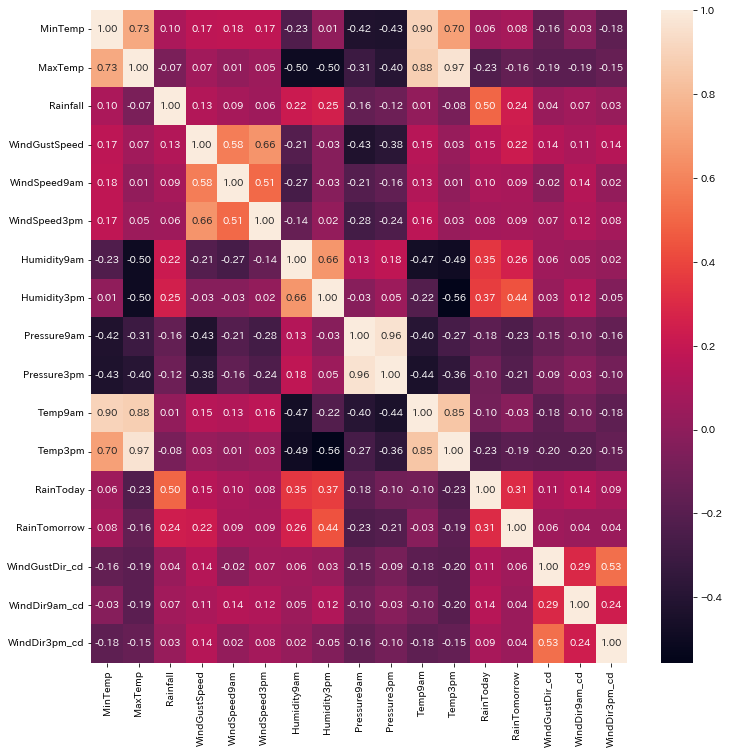

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [16]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir_cd', 'WindDir9am_cd', 'WindDir3pm_cd'],
      dtype='object')

In [17]:
X = df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(113754, 16)
(28439, 16)


In [18]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier()]

In [20]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
X_train.dtypes[X_train.dtypes != 'uint8'].index

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'ever_merried_cd', 'Residence_type_cd'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [25]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision 

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.953278,1.000000,0.005208,0.010363,0.944227,0.00000,0.000000,0.000000
1,KNeighborsClassifier,0.954012,0.700000,0.036458,0.069307,0.944227,0.50000,0.017544,0.033898
2,SVC,0.953033,0.000000,0.000000,0.000000,0.944227,0.00000,0.000000,0.000000
3,GaussianNB,0.362524,0.068312,0.994792,0.127845,0.363014,0.07932,0.982456,0.146789
4,DecisionTreeClassifier,0.953767,0.666667,0.031250,0.059701,0.944227,0.00000,0.000000,0.000000
5,RandomForestClassifier,0.953033,0.000000,0.000000,0.000000,0.944227,0.00000,0.000000,0.000000
6,GradientBoostingClassifier,0.959393,1.000000,0.135417,0.238532,0.942270,0.25000,0.017544,0.032787


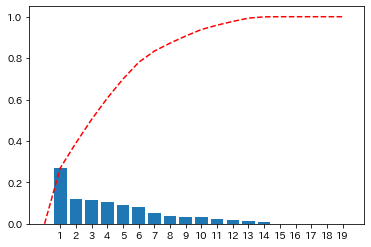

In [26]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [27]:
n = 7
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision 

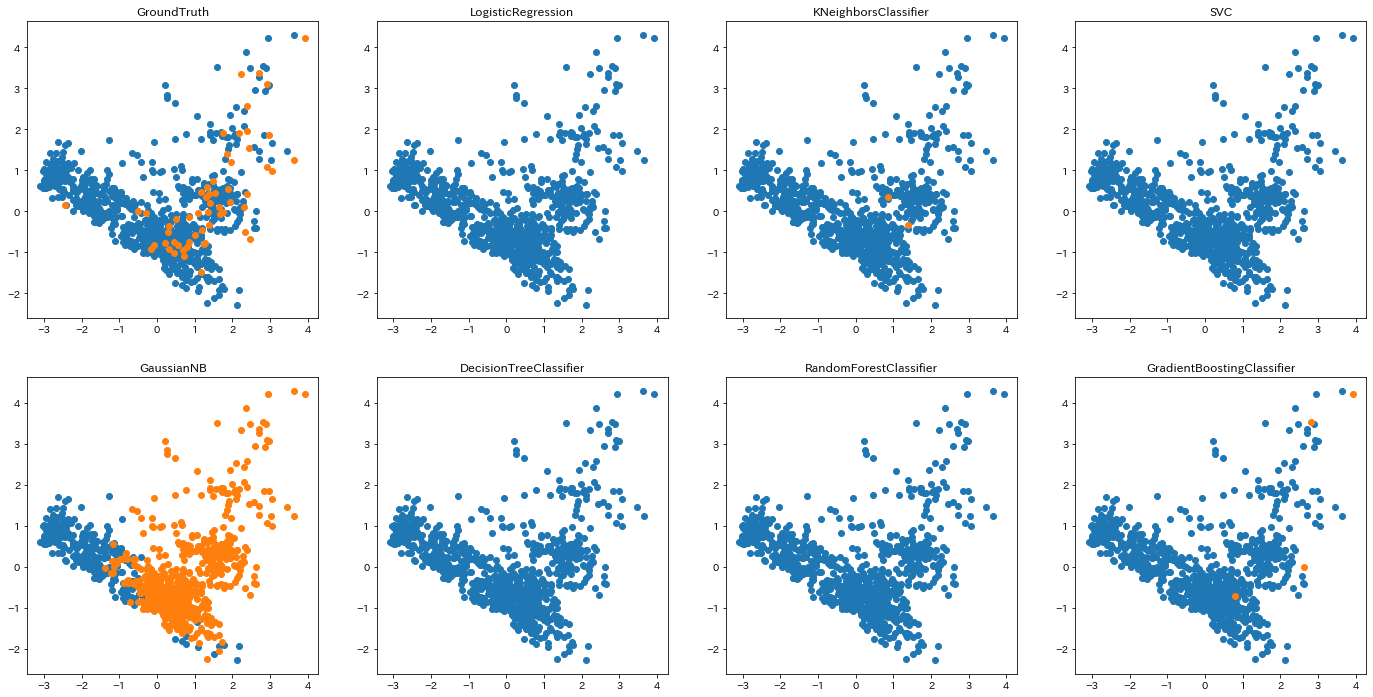

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.953278,1.000000,0.005208,0.010363,0.944227,0.00000,0.000000,0.000000
1,KNeighborsClassifier,0.954012,0.700000,0.036458,0.069307,0.944227,0.50000,0.017544,0.033898
2,SVC,0.953033,0.000000,0.000000,0.000000,0.944227,0.00000,0.000000,0.000000
3,GaussianNB,0.362524,0.068312,0.994792,0.127845,0.363014,0.07932,0.982456,0.146789
4,DecisionTreeClassifier,0.953767,0.666667,0.031250,0.059701,0.944227,0.00000,0.000000,0.000000
5,RandomForestClassifier,0.953033,0.000000,0.000000,0.000000,0.944227,0.00000,0.000000,0.000000
6,GradientBoostingClassifier,0.959393,1.000000,0.135417,0.238532,0.942270,0.25000,0.017544,0.032787


In [28]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp

Accuracy(訓練) 0.3576320939334638
Precision(訓練) 0.06659544159544159
Recall(訓練) 0.9739583333333334
F1(訓練) 0.12466666666666665
Accuracy(テスト) 0.35909980430528377
Precision(テスト) 0.07887323943661972
Recall(テスト) 0.9824561403508771
F1(テスト) 0.14602346805736638


Text(0.5, 1.0, 'kMeans')

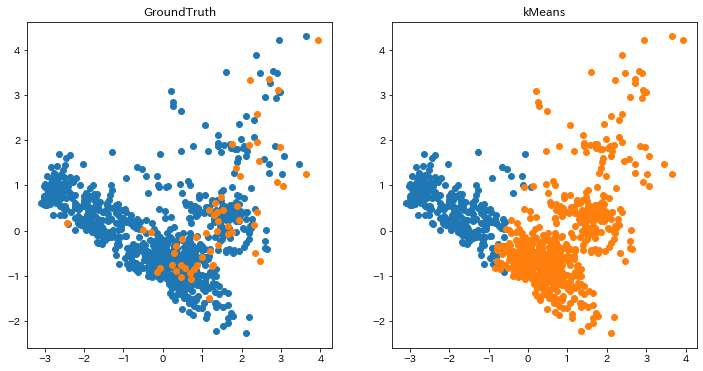

In [33]:
from sklearn import cluster

model = cluster.KMeans(n_clusters=2).fit(X_train_pca)
y_pred = model.predict(X_train_pca)
print('Accuracy(訓練)', metrics.accuracy_score(y_train, y_pred))
print('Precision(訓練)',metrics.precision_score(y_train, y_pred))
print('Recall(訓練)',metrics.recall_score(y_train, y_pred))
print('F1(訓練)', metrics.f1_score(y_train, y_pred))
y_pred = model.predict(X_test_pca)
print('Accuracy(テスト)', metrics.accuracy_score(y_test, y_pred))
print('Precision(テスト)',metrics.precision_score(y_test, y_pred))
print('Recall(テスト)',metrics.recall_score(y_test, y_pred))
print('F1(テスト)', metrics.f1_score(y_test, y_pred))

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12.0,6.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for j in np.unique(y_pred):
    X_tmp = X_test_pca[y_pred == j]
    ax[1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[1].set_title('kMeans')